### <span style="color:red">"CAUSALITY"</span> Worked Example 2

### Primarily Focus
#### <span style="color:red">Granger Causality:</span>

#### <span style="color:red">A specific method used in time series analysis to determine whether one time series can predict another.</span>

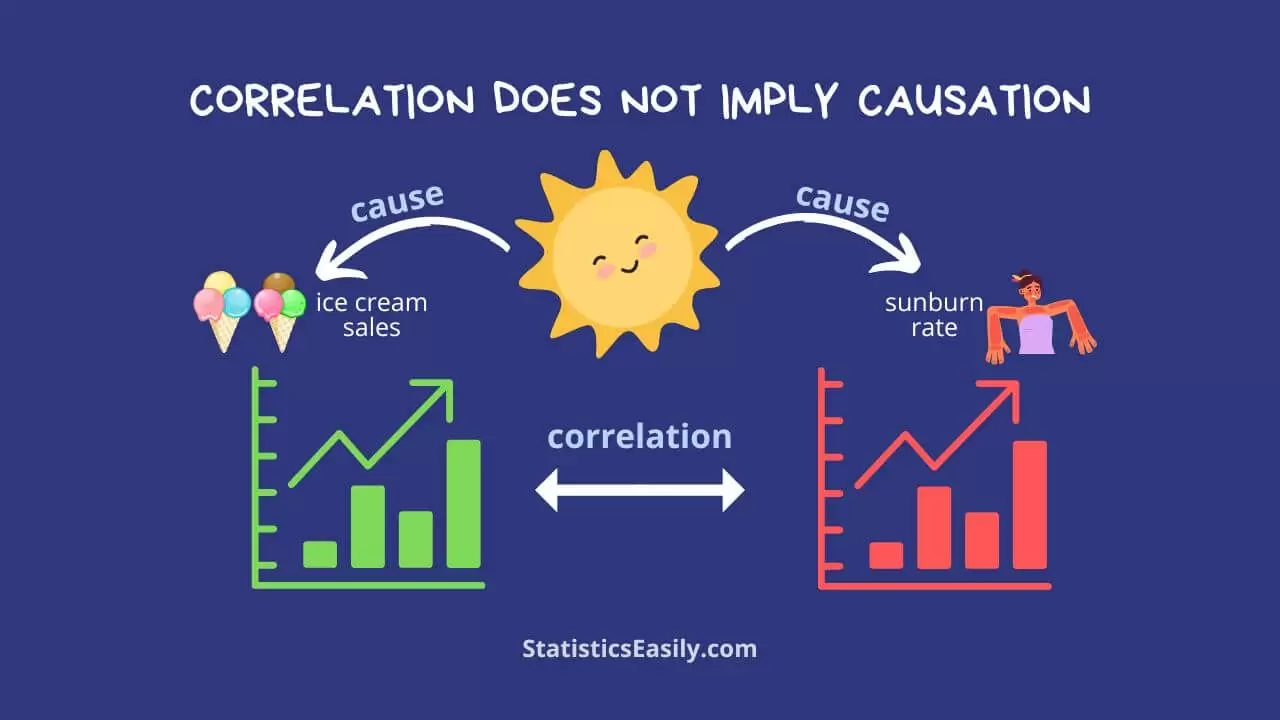

### Introduction to the Worked Example Problem

#### Average Temperature Dataset (1900-2023) (Same Target Variable as Worked Example 1)

This dataset tracks the average temperature, measured in Fahrenheit, from the year 1900 through to 2023. Each row represents a year and its corresponding average temperature. For example, the average temperature in 1900 was 53.9°F, while in 1904, it was slightly cooler at 51.8°F. The purpose of this dataset is likely to analyze trends in temperature over time, which can be crucial for studies on climate change, weather patterns, and their impacts on the environment and human activities.


#### Air Pollution Dataset (Different Independent Variable)
This dataset contains columns for Entity (the country), Code (country code), Year, and the annual mean exposure to PM2.5 air pollution (in micrograms per cubic meter)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests


# Load the datasets
air_pollution_df = pd.read_csv('https://raw.githubusercontent.com/Samar1947/Dataset/main/PM25-air-pollution.csv')
temperature_df = pd.read_csv('https://raw.githubusercontent.com/Samar1947/Dataset/main/Average%20Temperature%201900-2023.csv')

# Display the first few rows of each dataset to understand their structure
air_pollution_df.head(), temperature_df.head()


(        Entity Code  Year  \
 0  Afghanistan  AFG  1990   
 1  Afghanistan  AFG  1995   
 2  Afghanistan  AFG  2000   
 3  Afghanistan  AFG  2005   
 4  Afghanistan  AFG  2010   
 
    PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)  
 0                                          65.486794                       
 1                                          65.179512                       
 2                                          64.922462                       
 3                                          64.522682                       
 4                                          65.245590                       ,
    Year  Average_Fahrenheit_Temperature
 0  1900                            53.9
 1  1901                            53.5
 2  1902                            52.1
 3  1903                            50.6
 4  1904                            51.8)

### Data Alignment

In [15]:
# Assuming NumPy is imported as np and pandas as pd
import numpy as np

# Select only numeric columns for the mean calculation
numeric_cols_air_pollution = air_pollution_df.select_dtypes(include=[np.number])

# Group by 'Year' and calculate mean only on numeric columns
air_pollution_avg_by_year = numeric_cols_air_pollution.groupby('Year').mean().reset_index()

# Proceed with the merge operation as you initially intended
merged_df = pd.merge(air_pollution_avg_by_year, temperature_df_aligned, on='Year')

# Check the first few rows of the merged DataFrame
print(merged_df.head())


   Year  \
0  1990   
1  1995   
2  2000   
3  2005   
4  2010   

   PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)  \
0                                          30.049710                        
1                                          29.722338                        
2                                          29.750670                        
3                                          29.376687                        
4                                          29.514376                        

   Average_Fahrenheit_Temperature  
0                            53.4  
1                            53.9  
2                            54.0  
3                            54.2  
4                            53.4  


#### The merged dataset now aligns both the air pollution and temperature data starting from 1990, providing a foundation for our analysis. It includes the following columns:

Year: The year for the data entry.

PM2.5 air pollution, mean annual exposure (micrograms per cubic meter): The mean annual exposure to PM2.5 particulate pollution.

Average_Fahrenheit_Temperature: The average temperature in Fahrenheit for each year.

### Data Profiling

In [16]:
# Checking for missing values
missing_values = merged_df.isnull().sum()

# Statistical summary of the dataset
statistical_summary = merged_df.describe()

missing_values, statistical_summary


(Year                                                                      0
 PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)    0
 Average_Fahrenheit_Temperature                                            0
 dtype: int64,
               Year  \
 count    12.000000   
 mean   2008.166667   
 std       8.788767   
 min    1990.000000   
 25%    2003.750000   
 50%    2011.500000   
 75%    2014.250000   
 max    2017.000000   
 
        PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)  \
 count                                          12.000000                        
 mean                                           29.014898                        
 std                                             0.878280                        
 min                                            27.424216                        
 25%                                            28.359237                        
 50%                                            29.29

### Data Visualization

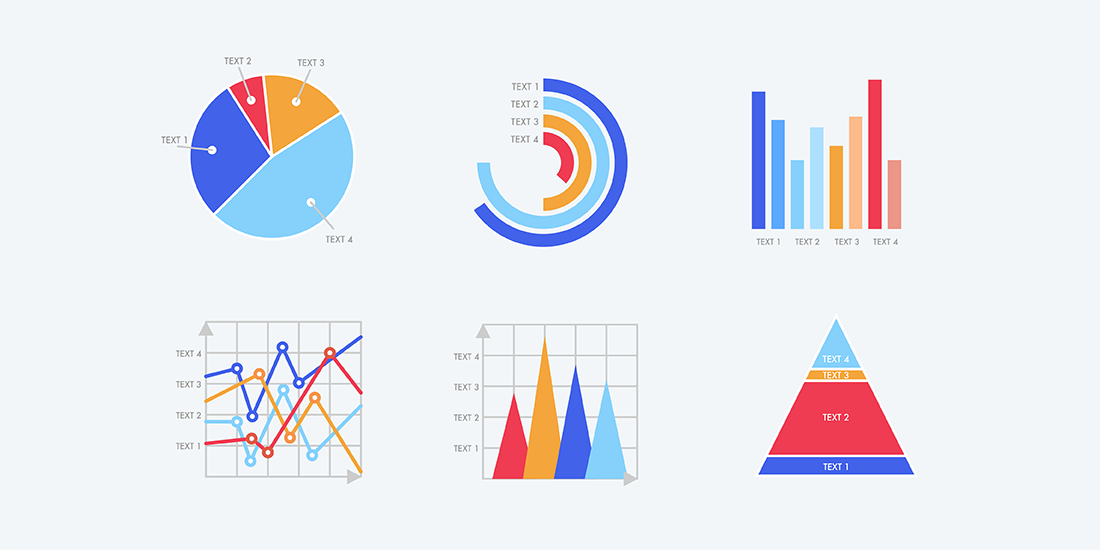

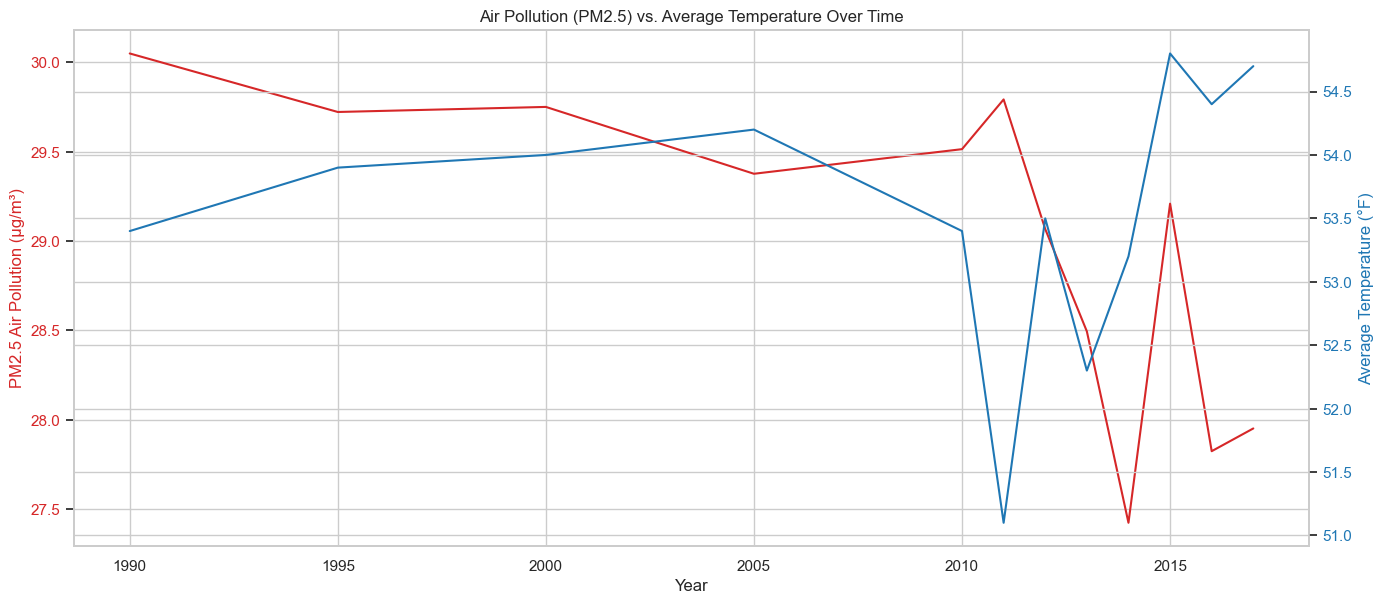

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set(style="whitegrid")

# Creating a figure with two subplots
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('PM2.5 Air Pollution (µg/m³)', color=color)
ax1.plot(merged_df['Year'], merged_df['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Temperature (°F)', color=color)
ax2.plot(merged_df['Year'], merged_df['Average_Fahrenheit_Temperature'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Air Pollution (PM2.5) vs. Average Temperature Over Time')
plt.show()



/Users/samar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


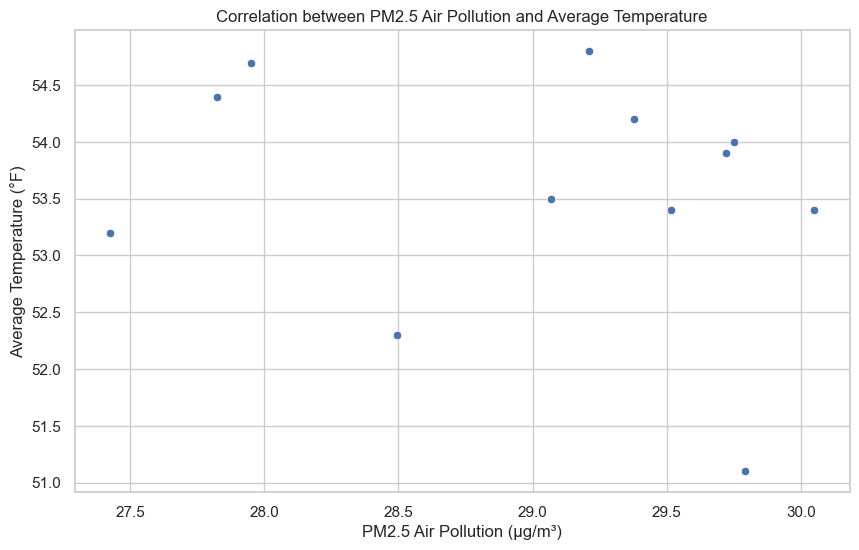

In [18]:
# Scatter plot for correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)', y='Average_Fahrenheit_Temperature', data=merged_df)
plt.title('Correlation between PM2.5 Air Pollution and Average Temperature')
plt.xlabel('PM2.5 Air Pollution (µg/m³)')
plt.ylabel('Average Temperature (°F)')
plt.show()


#### Air Pollution (PM2.5) vs. Average Temperature Over Time: This line plot shows the trends in PM2.5 air pollution and average temperature from 1990 to 2017. Although both metrics fluctuate over time, it's not immediately clear from this visualization alone whether there's a direct correlation between air pollution levels and temperature changes.

#### Correlation between PM2.5 Air Pollution and Average Temperature: The scatter plot explores the relationship between PM2.5 air pollution levels and average temperature. Each point represents a year, plotting its pollution level against its average temperature. While this plot helps visualize the data points' distribution, assessing a clear correlation requires further statistical analysis.

### <span style="color:red"> 'GRANGER CAUSALITY TEST'</span>

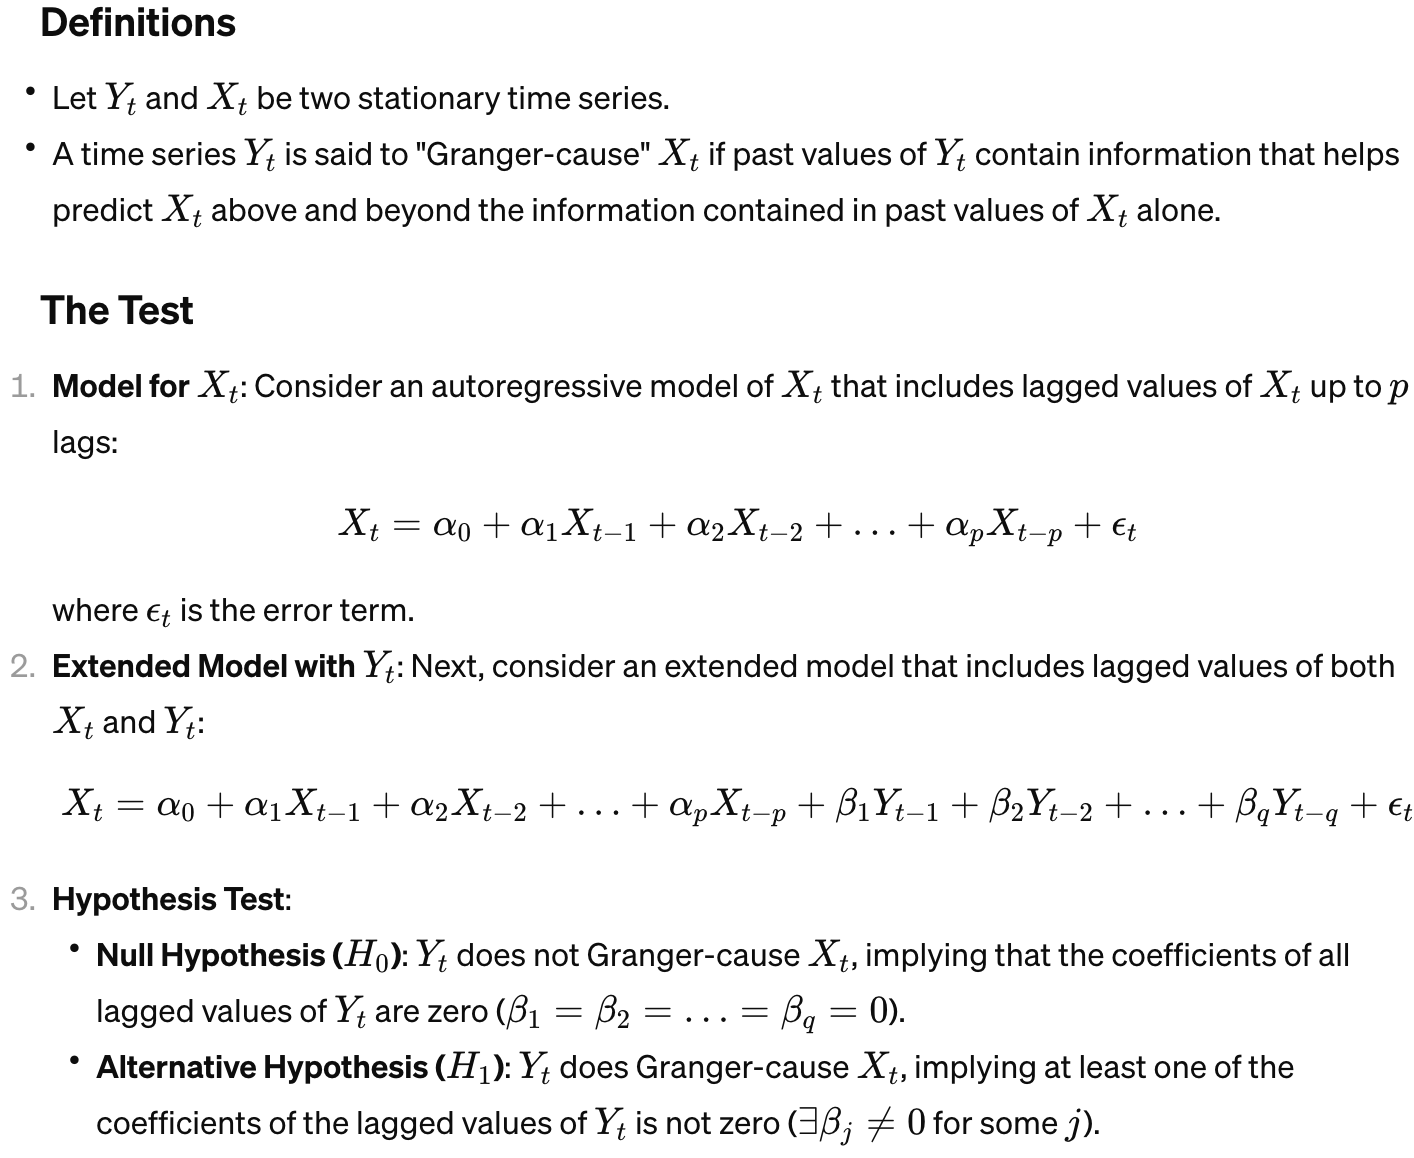

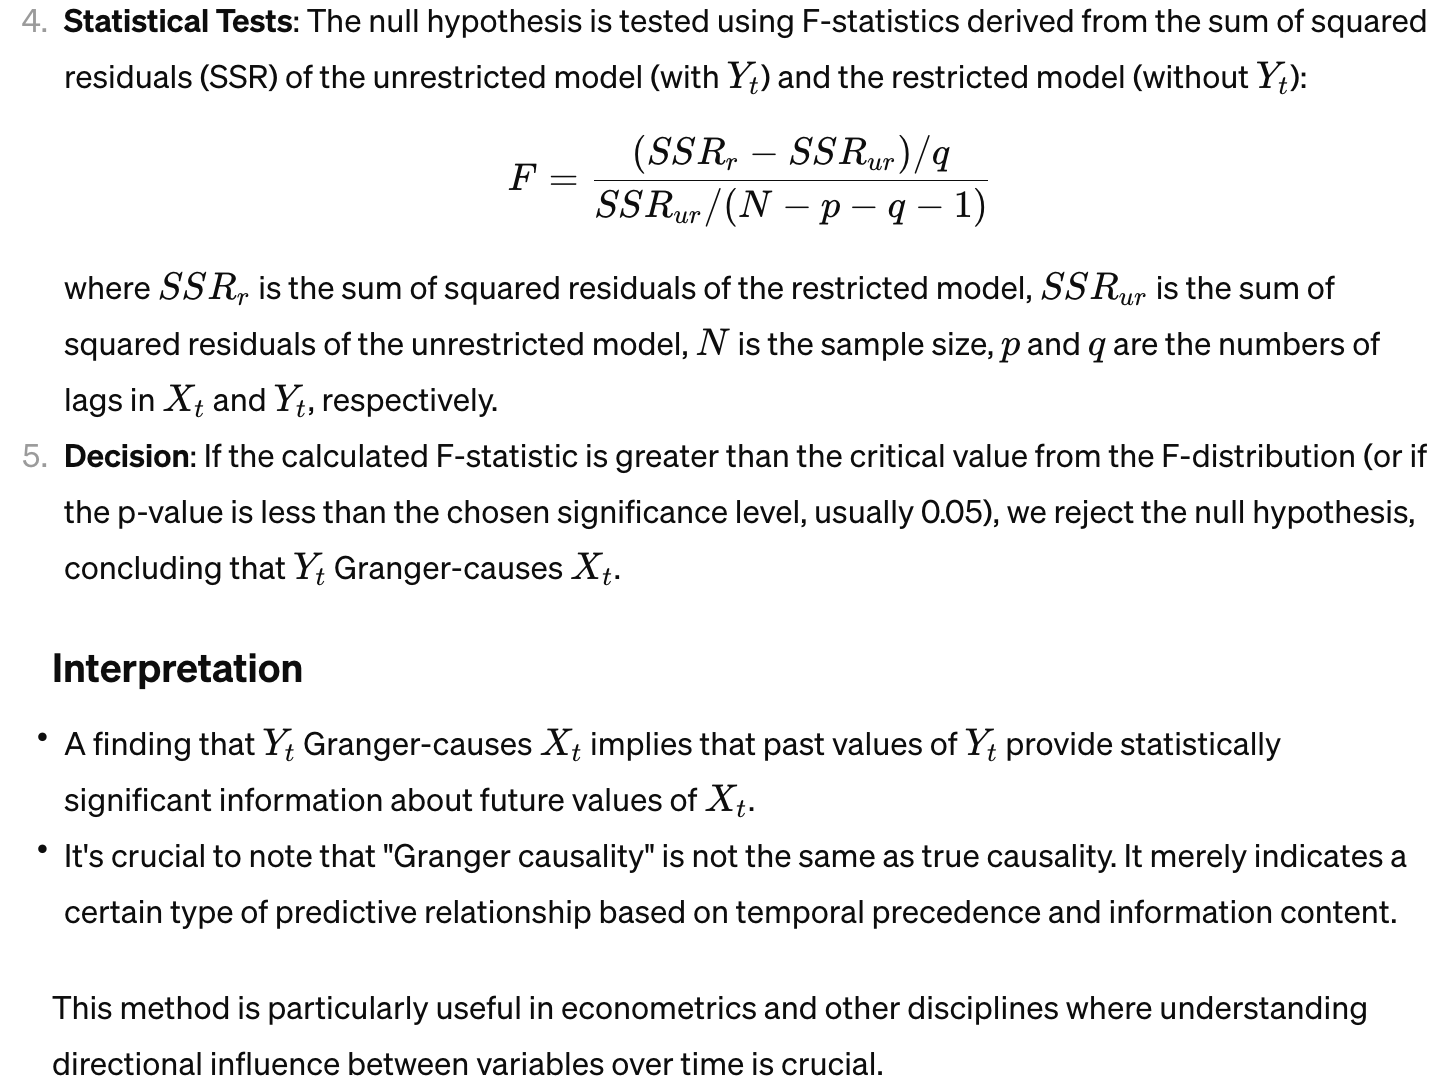

In [20]:
data_for_test = merged_df[['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)', 'Average_Fahrenheit_Temperature']]

# Adjusting the maxlag parameter to 2 based on the dataset size
granger_test_results_adjusted = grangercausalitytests(data_for_test, maxlag=2, verbose=True)

# Checking for Granger causality detection with adjusted lag
granger_causality_detected_adjusted = any(
    result[0]['ssr_chi2test'][1] < 0.05 for result in granger_test_results_adjusted.values()
)

granger_causality_detected_adjusted



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0114  , p=0.9175  , df_denom=8, df_num=1
ssr based chi2 test:   chi2=0.0157  , p=0.9002  , df=1
likelihood ratio test: chi2=0.0157  , p=0.9003  , df=1
parameter F test:         F=0.0114  , p=0.9175  , df_denom=8, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0503  , p=0.9514  , df_denom=5, df_num=2
ssr based chi2 test:   chi2=0.2013  , p=0.9043  , df=2
likelihood ratio test: chi2=0.1993  , p=0.9052  , df=2
parameter F test:         F=0.0503  , p=0.9514  , df_denom=5, df_num=2


/Users/samar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


False

#### The Granger causality test, adjusted to a maximum lag of 2, does not indicate a causal relationship between air pollution (PM2.5) levels and average temperature, as the p-values are significantly above the 0.05 threshold in all tests. This result suggests that, based on the available data and within the confines of the Granger causality test's assumptions, we cannot conclude that PM2.5 air pollution Granger-causes temperature rise.



#### <span style="color:red">In our First worked example, we observed a distinct causal relationship between the dependent and independent variables. However, in this case, there is no evidence of causality, and the p-value supports this assertion.</span>

### CONCLUSION

#### Based on our analysis, there is a weak negative correlation between air pollution (PM2.5) levels and temperature, but we did not find evidence to support a strong causal relationship from the Granger causality test. This outcome suggests that while air pollution and temperature may be related, the relationship is complex and likely influenced by a multitude of factors beyond the scope of this analysis. Environmental and climatic changes are multifaceted phenomena that depend on various interacting factors, including but not limited to air pollution.

### REFERENCES

1. https://www.kaggle.com/datasets/daverosenman/nba-finals-team-stats

2. https://towardsdatascience.com/tagged/sports-analytics

3. https://www.newscientist.com/definition/causality/

### LICENSE

Copyright (c) 2023 Samarjeet Chavan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.